In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import h5py
import PIL
import seaborn
import plotly
import sklearn_pandas

print('OK (puede salir algún warning, eso no sería problema)')

OK (puede salir algún warning, eso no sería problema)


In [52]:
data = pd.read_csv('./heart_disease_data_with_features.csv')

In [53]:
data.shape
# Muestra las dimensiones del dataframe

(303, 36)

In [54]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,chol_trestbps_ratio,log_thalach_chol,symptom_zscore,avg_chol_by_age_group,thalach_chol_diff,symptom_severity_diff,age_chol_effect,thalach_risk_effect,age_trestbps_effect,chol_risk_ratio
0,63,1,1,145,233,1,2,150,0,2.3,...,1.595890,0.919704,-0.275764,260.024691,-83,-2.532099,14679,2419.350,9135,13.602662
1,67,1,4,160,286,0,2,108,1,1.5,...,1.776398,0.828936,0.568702,260.024691,-178,1.167901,19162,2242.296,10720,13.142174
2,67,1,4,120,229,0,2,129,1,2.6,...,1.892562,0.895083,1.572932,260.024691,-100,5.567901,15343,2134.047,8040,13.053640
3,37,1,3,130,250,0,0,187,0,3.5,...,1.908397,0.947695,1.595755,219.785714,-63,8.178571,9250,1972.850,4810,21.645022
4,41,0,2,130,204,0,2,172,0,1.4,...,1.557252,0.968116,-0.161647,235.847222,-32,0.783333,8364,1662.208,5330,19.129782
5,56,1,2,120,236,0,0,178,0,0.8,...,1.950413,0.948670,-0.435528,247.424000,-58,-2.034400,13216,2566.048,6720,15.308770
6,62,0,4,140,268,0,2,160,0,3.6,...,1.900709,0.908251,2.485868,260.024691,-108,9.567901,16616,2882.560,8680,14.093395
7,57,0,4,120,354,0,0,163,1,0.6,...,2.925620,0.868488,-0.252941,247.424000,-191,-1.234400,20178,3484.614,6840,15.819108
8,63,1,4,130,254,0,2,147,0,1.4,...,1.938931,0.901818,0.477408,260.024691,-107,0.767901,16002,2543.394,8190,13.878265
9,53,1,4,140,203,1,2,155,1,3.1,...,1.439716,0.949557,2.029400,247.424000,-48,8.765600,10759,1884.645,7420,15.426704


In [23]:
subset = data.loc[:, ['sex','cp','fbs','restecg','thalach', 'exang','oldpeak','slope', 'ca','thal', 'num','age_group', 'cholesterol_level', 'bp_level','risk_score', 'symptom_severity', 'risk_factor', 'avg_chol_by_age_group']]
# Dividimos por las columnas de interes
subset.describe()

,sex,cp,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,risk_score,symptom_severity,risk_factor,avg_chol_by_age_group
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000,303.000000,303.000000,301.000000,302.000000
mean,0.679868,3.158416,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294,14.844073,3.508251,19.733887,246.834437
std,0.467299,0.960126,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536,4.073047,4.381467,28.421998,10.493973
min,0.000000,1.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,7.216000,0.000000,0.000000,219.785714
25%,0.000000,3.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,12.080000,0.000000,0.000000,235.847222
50%,1.000000,3.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000,14.392000,1.800000,7.200000,247.424000
75%,1.000000,4.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000,17.181000,5.500000,28.800000,260.024691
max,1.000000,4.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000,38.938000,24.800000,173.600000,260.024691


In [37]:
subset.head(10)

,sex,cp,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,age_group,cholesterol_level,bp_level,risk_score,symptom_severity,risk_factor,avg_chol_by_age_group
0,1,1,1,2,150,0,2.3,3,0.0,6.0,0,60s,normal,high,16.129,2.3,13.8,260.024691
1,1,4,0,2,108,1,1.5,2,3.0,3.0,2,60s,high,high,20.762,6.0,18.0,260.024691
2,1,4,0,2,129,1,2.6,2,2.0,7.0,1,60s,normal,low,16.543,10.4,72.8,260.024691
3,1,3,0,0,187,0,3.5,3,0.0,3.0,0,30s,high,normal,10.550,10.5,31.5,219.785714
4,0,2,0,2,172,0,1.4,1,0.0,3.0,0,40s,normal,normal,9.664,2.8,8.4,235.847222
5,1,2,0,0,178,0,0.8,1,0.0,3.0,0,50s,normal,low,14.416,1.6,4.8,247.424000
6,0,4,0,2,160,0,3.6,3,2.0,3.0,3,60s,high,normal,18.016,14.4,43.2,260.024691
7,0,4,0,0,163,1,0.6,1,0.0,3.0,0,50s,high,low,21.378,2.4,7.2,247.424000
8,1,4,0,2,147,0,1.4,2,1.0,7.0,2,60s,high,normal,17.302,5.6,39.2,260.024691
9,1,4,1,2,155,1,3.1,3,0.0,7.0,1,50s,normal,normal,12.159,12.4,86.8,247.424000


In [36]:
subset.dtypes
# Mostramos los tipos de datos

sex                        int64
cp                         int64
fbs                        int64
restecg                    int64
thalach                    int64
exang                      int64
oldpeak                  float64
slope                      int64
ca                       float64
thal                     float64
num                        int64
age_group                 object
cholesterol_level         object
bp_level                  object
risk_score               float64
symptom_severity         float64
risk_factor              float64
avg_chol_by_age_group    float64
dtype: object

In [38]:
subset.sample(10)
# Elije 10 filas al azar del DataFrame

,sex,cp,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,age_group,cholesterol_level,bp_level,risk_score,symptom_severity,risk_factor,avg_chol_by_age_group
93,0,3,0,0,175,0,0.6,2,0.0,3.0,0,40s,low,low,7.284,1.8,5.4,235.847222
39,1,3,1,0,137,1,1.0,2,0.0,3.0,0,60s,high,high,16.323,3.0,9.0,260.024691
295,1,2,0,0,182,0,0.0,1,0.0,3.0,0,40s,low,low,7.637,0.0,0.0,235.847222
72,1,4,0,0,99,1,1.8,2,2.0,7.0,1,60s,high,low,17.754,7.2,50.4,260.024691
166,1,3,0,0,169,0,0.0,1,NaN,3.0,0,50s,normal,normal,12.976,0.0,0.0,247.424000
284,1,4,0,0,161,0,0.0,1,1.0,7.0,2,60s,normal,high,13.863,0.0,0.0,260.024691
36,1,4,0,2,120,1,2.5,2,0.0,7.0,3,40s,low,low,8.811,10.0,70.0,235.847222
83,1,3,1,2,150,1,1.6,2,0.0,7.0,3,60s,high,high,20.432,4.8,33.6,260.024691
256,0,4,0,0,142,0,0.3,1,2.0,3.0,0,60s,normal,low,16.001,1.2,3.6,260.024691
198,0,2,0,0,162,0,1.1,1,0.0,3.0,0,50s,high,low,13.400,2.2,6.6,247.424000


In [30]:
subset.isnull().sum()

sex                      0
cp                       0
fbs                      0
restecg                  0
thalach                  0
exang                    0
oldpeak                  0
slope                    0
ca                       4
thal                     2
num                      0
age_group                1
cholesterol_level        1
bp_level                 2
risk_score               0
symptom_severity         0
risk_factor              2
avg_chol_by_age_group    1
dtype: int64

**Detalle de la variable de salida**

<Axes: title={'center': 'num'}, xlabel='num'>

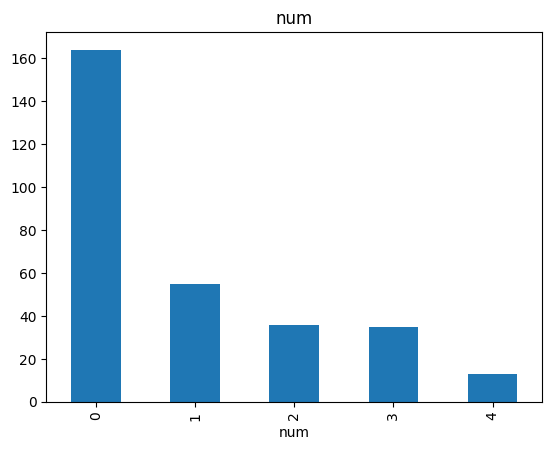

In [51]:
subset.num.value_counts().plot.bar(title='num')

Con el gráfico en barras podemos deducir que en la mayoria de datos del subconjunto es 0, es decir, que no se detectaron enfermedades. Y luego la cantidad de casos donde se empieza a detectar un aumento en las enfermedades.